# Bank Stocks from 2006-present

This notebook focuses on exploratory data analysis of stock prices for the banks listed below. For data extraction and visualization, python based tools has been used e.g. pandas-datareader to get the data, matplotlib/seaborn to plot it. 

### Goal
Focus on trends in bank stocks during the [financial crisis of 2007–2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) and how they are progressing a decade after that. We will do very simple statistical analysis - for the entire range of time-index, let's plot :
- 'Close' price of each bank's stock
- calculate daily percentage change in stock's price 
- calculate and return monthly market volatility 

We will get stock information for the following banks from yahoo finance:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
* HSBC

In [2]:
from pandas_datareader import DataReader
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
#tickers of a few largest finance companies
tickers = ['BAC','C','GS','JPM','MS','WFC','HSBC']
panel = DataReader(tickers, 'yahoo', start=date(2006,1,1))
data = panel.to_frame()
data.head(12)

Adj Close       Close        High         Low        Open  \
Date       minor                                                               
2018-01-08 BAC     30.120001   30.120001   30.270000   30.049999   30.230000   
           C       74.529999   74.529999   75.239998   74.331001   75.169998   
           GS     251.809998  251.809998  255.179993  251.619995  254.750000   
           HSBC    51.750000   51.750000   51.849998   51.619999   51.630001   
           JPM    108.500000  108.500000  108.680000  107.699997  108.150002   
           MS      52.889999   52.889999   53.169998   52.689999   52.930000   
           WFC     62.040001   62.040001   62.730000   61.939999   62.660000   
2018-01-05 BAC     30.330000   30.330000   30.420000   30.049999   30.370001   
           C       75.410004   75.410004   75.769997   74.959999   75.709999   
           GS     255.520004  255.520004  257.489990  253.690002  257.179993   
           HSBC    52.169998   52.169998   52.180000   51.889999   52.020000   
           JPM    108.339996  108.339996  109.550003  107.779999  109.260002   

                      Volume  
Date       minor              
2018-01-08 BAC    42847101.0  
           C      13849525.0  
           GS      2933462.0  
           HSBC    1255309.0  
           JPM    11933321.0  
           MS      6700124.0  
           WFC    15548115.0  
2018-01-05 BAC    56124600.0  
           C      14863300.0  
           GS      2585200.0  
           HSBC    1871100.0  
           JPM    13300300.0

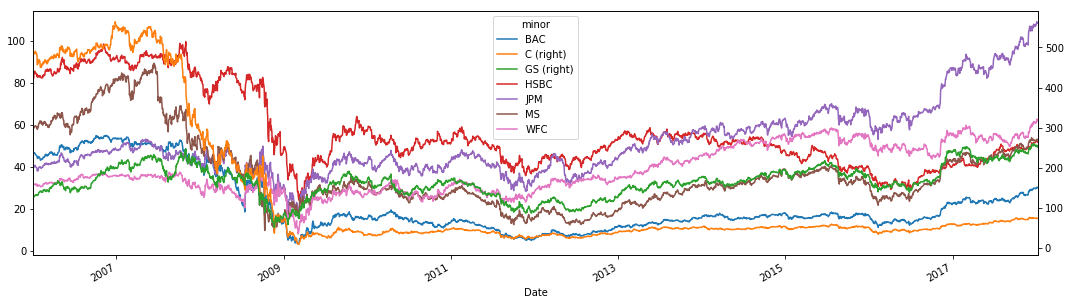

In [3]:
#plot stock prices
unstack = data['Close'].unstack()
unstack.plot(figsize=(18,5), secondary_y = ["C", "GS"])
plt.show()

We can clearly see in this stock price plot, the known crash of [Citigroup after 2008](https://en.wikipedia.org/wiki/Citigroup#Collapse_&_US_Government_Intervention_(2008). Also, interesting to note how the other major banks like Goldman Sachs, JPMorgan Chase, Wells Fargo etc. dips and bounches back after the recession quite quickly.

** Let us check the daily percentage change in each bank's stock price, defined as:**

$$r_t = \frac{p_t}{p_{t-1}} - 1$$

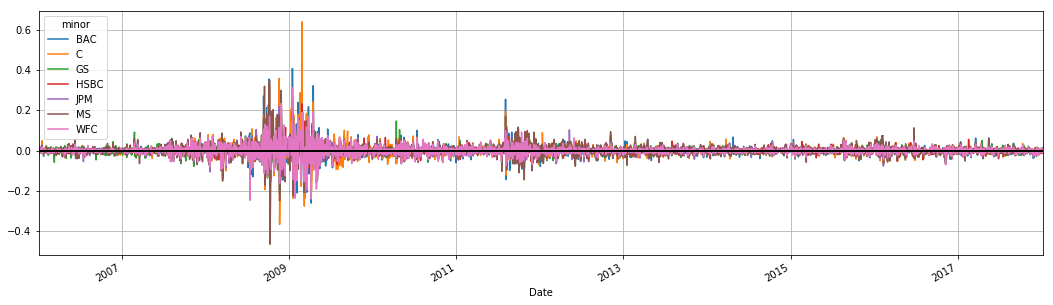

In [4]:
# daily returns
unstack_adj = data['Adj Close'].unstack()
daily_pct_change = unstack_adj.pct_change()
daily_pct_change.fillna(0, inplace=True) 
daily_pct_change.plot(figsize=(18,5), label=tickers, grid = True).axhline(y = 0, color = "black", lw = 2)
plt.show()

## Volatility of a stock

It is measured as change in variance in the returns of a stock over a specific period of time. We can simply calculate it from the rolling window standard deviation on the percentage change in a stock. 

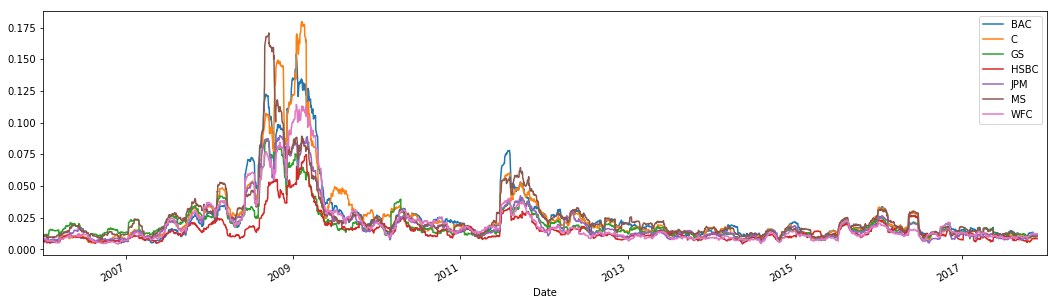

In [5]:
# Calculate the volatility for each month starting 2006
vol = daily_pct_change.rolling(30).std() 
vol.plot(figsize=(18, 5))
plt.legend()
plt.show()

By comparing the volatility of a stock with another stock, we can easily get the feel of the risk. Generally, the higher the volatility, the riskier the investment in that stock is. In simple words, the basic measurement in the riskiness of a stock is the standard deviation of the returns of the stock. So, we see higher volatility during 2008-recession and around [Aug-2011](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), but after 2017, market seems quite stable!

We will talk about moving averages and trading strategies in next article.

** But please note that this article should be used for learning purposes only and is not a financial advice. **